In [41]:
import cv2
from functions.blur_detection import blur_detector, plot_steps
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path

In [42]:
def plot_images(images, labels=None, dims="23"):
    plt.figure(figsize=(12, 12))
    for i, img in enumerate(images):
        plt.subplot(int(dims + f'{i+1}'))
        if labels is not None:
            plt.title(str(labels[i]))
        plt.imshow(img, cmap='gray')
        plt.tick_params(left=False, right=False, 
                        labelleft=False, labelbottom=False, bottom=False)

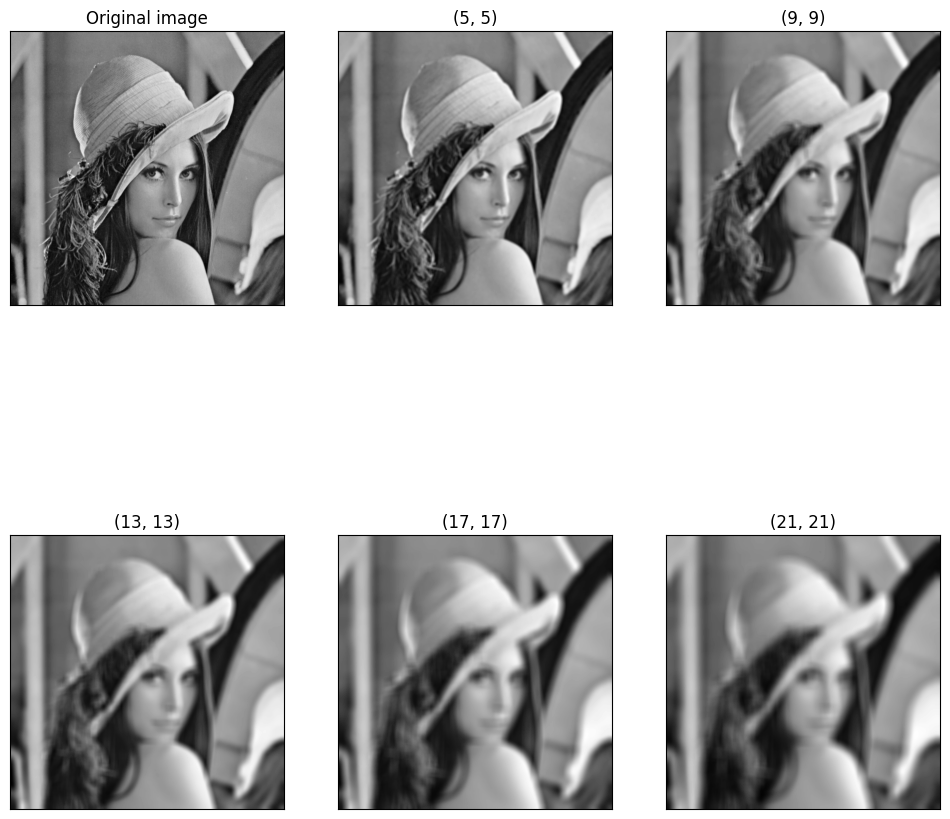

In [43]:
lenna = cv2.imread("../data/images/lenna.png", flags=cv2.IMREAD_GRAYSCALE)

# Filtersizes to use
k_sizes = [(i, i) for i in range(5, 22, 4)]
# Apply mean-filtering with different filtersizes to the images
blur_images = [cv2.blur(lenna, ksize=k) for k in k_sizes]

labels = ['Original image'] + [str(k) for k in k_sizes]
blur_images = [lenna, *blur_images]

# Plot images with different blur-levels
plot_images(blur_images, labels)

In [44]:
# threshold of 8 is used as default
res = [blur_detector(img) for img in blur_images]
is_blurry = [r['is_blurry'] for r in res]
score = [r['score'] for r in res]

print(is_blurry)
print(score)

[False, True, True, True, True, True]
[23.00988505868834, 7.387561364385542, -11.048986183735508, -9.933485139410823, -13.761942561430015, -15.838542519933183]


Only the first image is considered non_blurry.
## Lets try with another image:

Since this image is of a smaller resolution, we can use a smaller filter

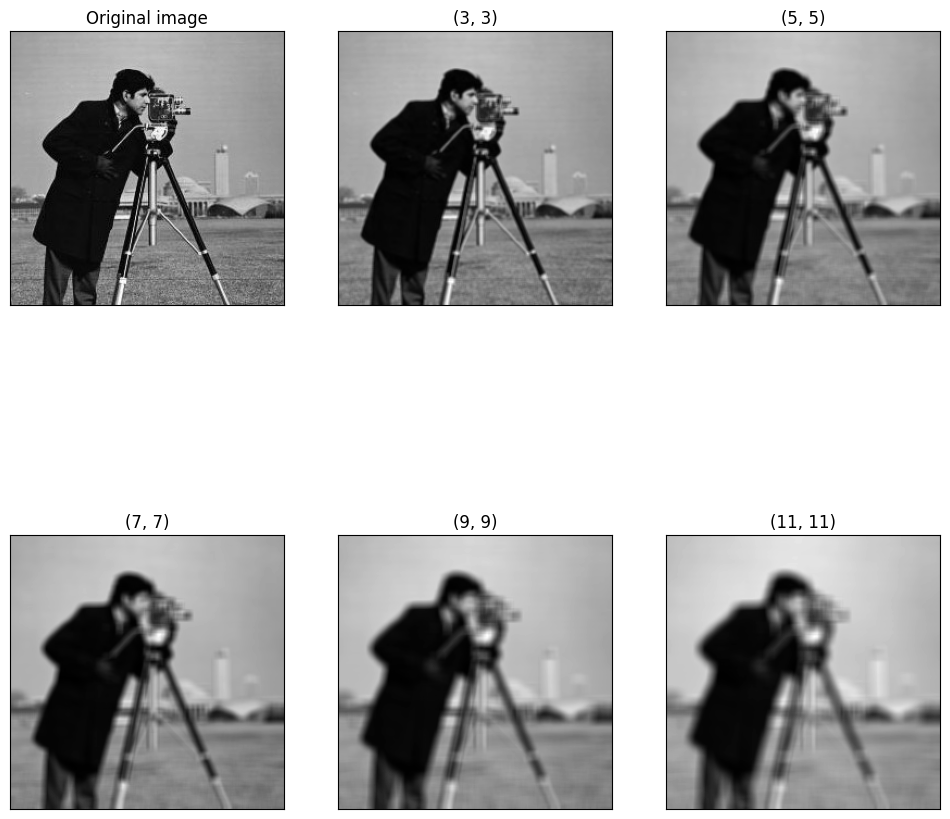

In [45]:
cameraman = cv2.imread(
    "../data/images/cameraman.png", flags=cv2.IMREAD_GRAYSCALE
)

k_sizes = [(i, i) for i in range(3, 12, 2)]
labels = [str(k) for k in k_sizes]

# Apply mean-filtering with different filtersizes to the images
blur_images = [cv2.blur(cameraman, ksize=k) for k in k_sizes]

labels = ['Original image'] + [str(k) for k in k_sizes]
blur_images = [cameraman, *blur_images]

# Plot images with different blur-levels
plot_images(blur_images, labels)

In [46]:
res = [blur_detector(img) for img in blur_images]
is_blurry = [r['is_blurry'] for r in res]
score = [r['score'] for r in res]

print(is_blurry)
print(score)

[False, True, True, True, True, True]
[24.764356512494835, 7.80890198825674, -8.096865826882583, -6.368806048634052, -12.709138074234938, -13.84683117184745]


Again, only the original sharp image is classified as "non-blurry"

# Lets try with an array of different images

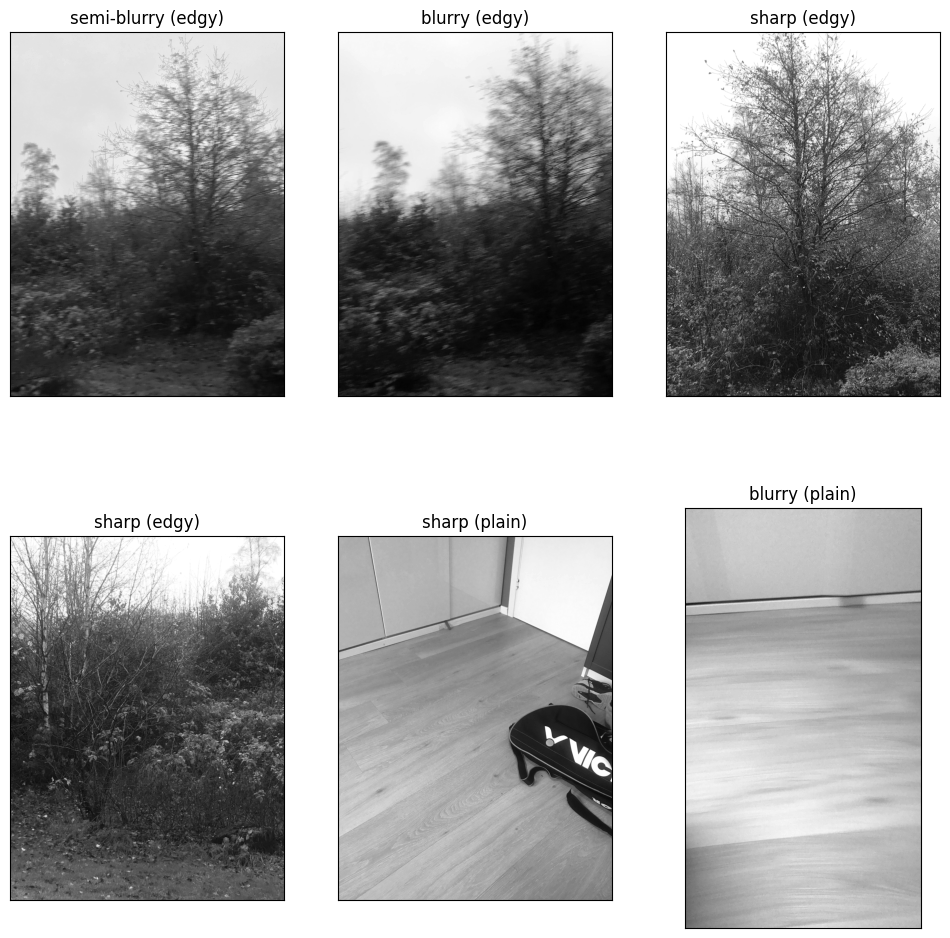

In [47]:
paths = Path('../data/images/').glob('f?.jpg')
images = [cv2.imread(str(p), flags=cv2.IMREAD_GRAYSCALE) for p in paths]

dims = '23'
labels = ['semi-blurry (edgy)', 'blurry (edgy)', 'sharp (edgy)', 'sharp (edgy)', 'sharp (plain)', 'blurry (plain)']
plot_images(images, labels, dims)

Lets look at the scores:

In [48]:
# The size paramter should increase as image-size increase.
res = [blur_detector(img, size=100) for img in images]
scores = [r['score'] for r in res]
np.array(scores).reshape((2,3))

array([[21.12542557, 16.73474158, 45.41951153],
       [37.21654831, 18.92716525,  5.33843074]])

We can see that the sharper images gets a higher score, lets analyze the process:
First we look at the most blurry, and the most sharp of the images with edgy backgrounds

mean score: 16.7347415773703


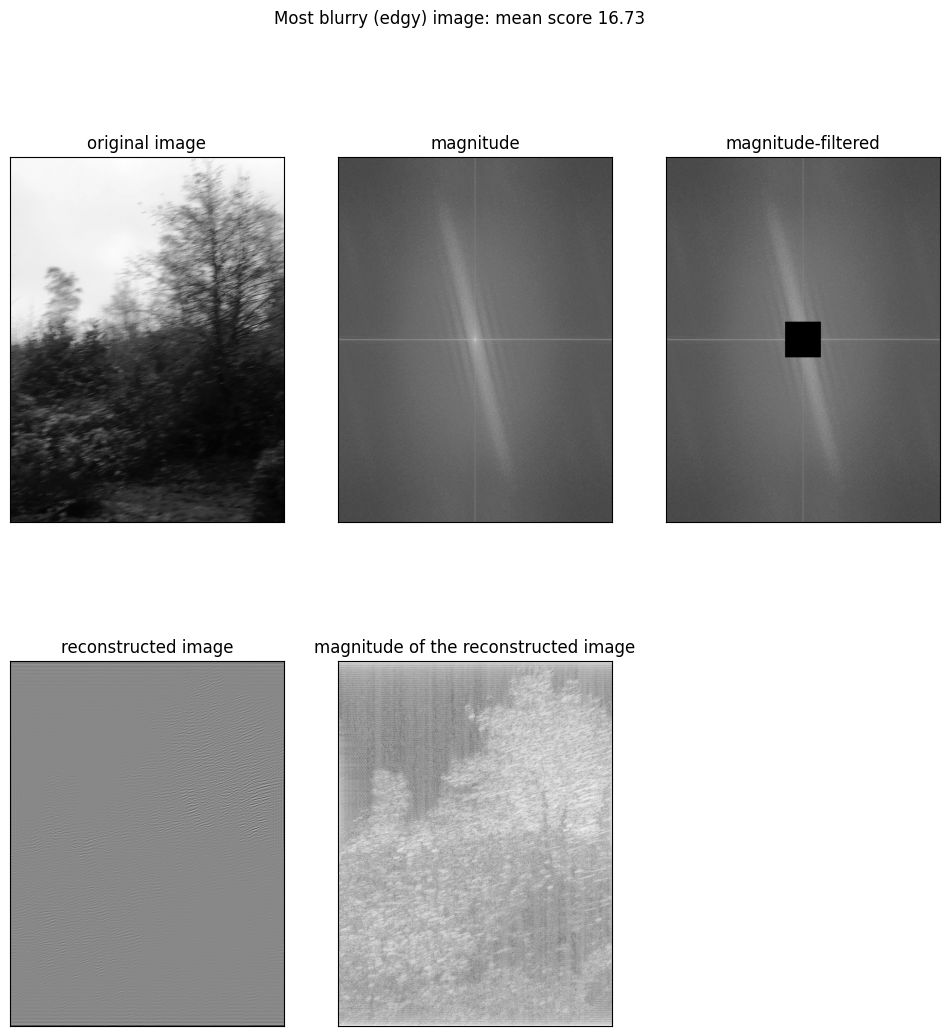

In [49]:
# First we look at one of the blurry images:
step_images = [r['step_images'] for r in res]

plot_steps(step_images[1], suptitle=f'Most blurry (edgy) image: mean score {np.round(scores[1], 2)}')
print(f'mean score: {scores[1]}')

mean score: 45.41951152742039


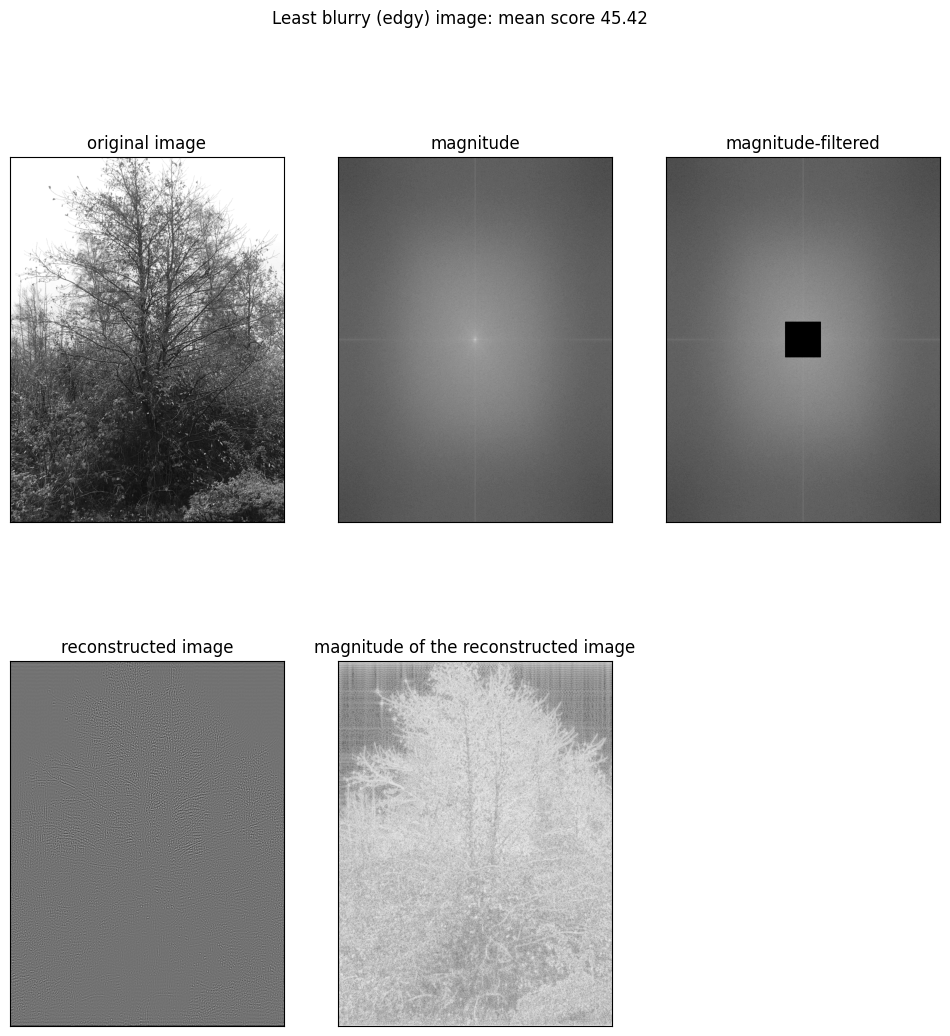

In [50]:
plot_steps(step_images[2], suptitle=f'Least blurry (edgy) image: mean score {np.round(scores[2], 2)}')
print(f'mean score: {scores[2]}')

mean score: 5.338430743352916


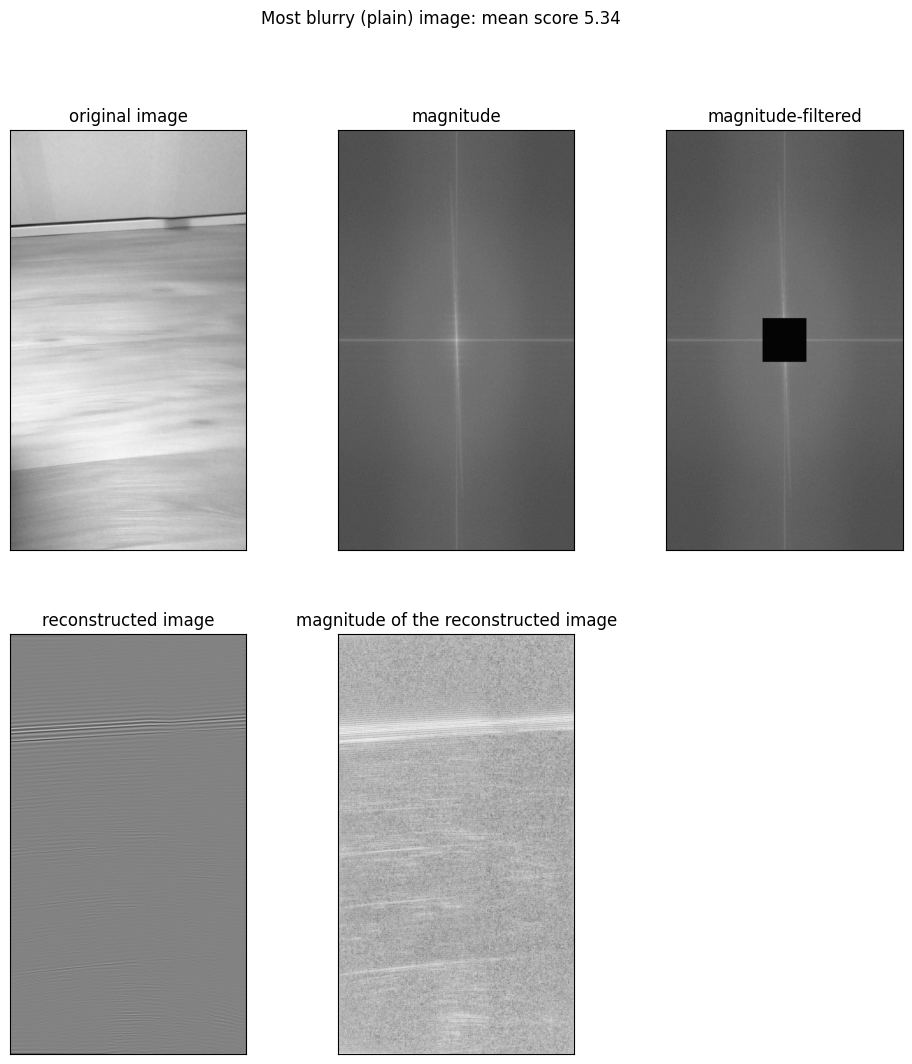

In [51]:
plot_steps(step_images[5], suptitle=f'Most blurry (plain) image: mean score {np.round(scores[5], 2)}')
print(f'mean score: {scores[5]}')

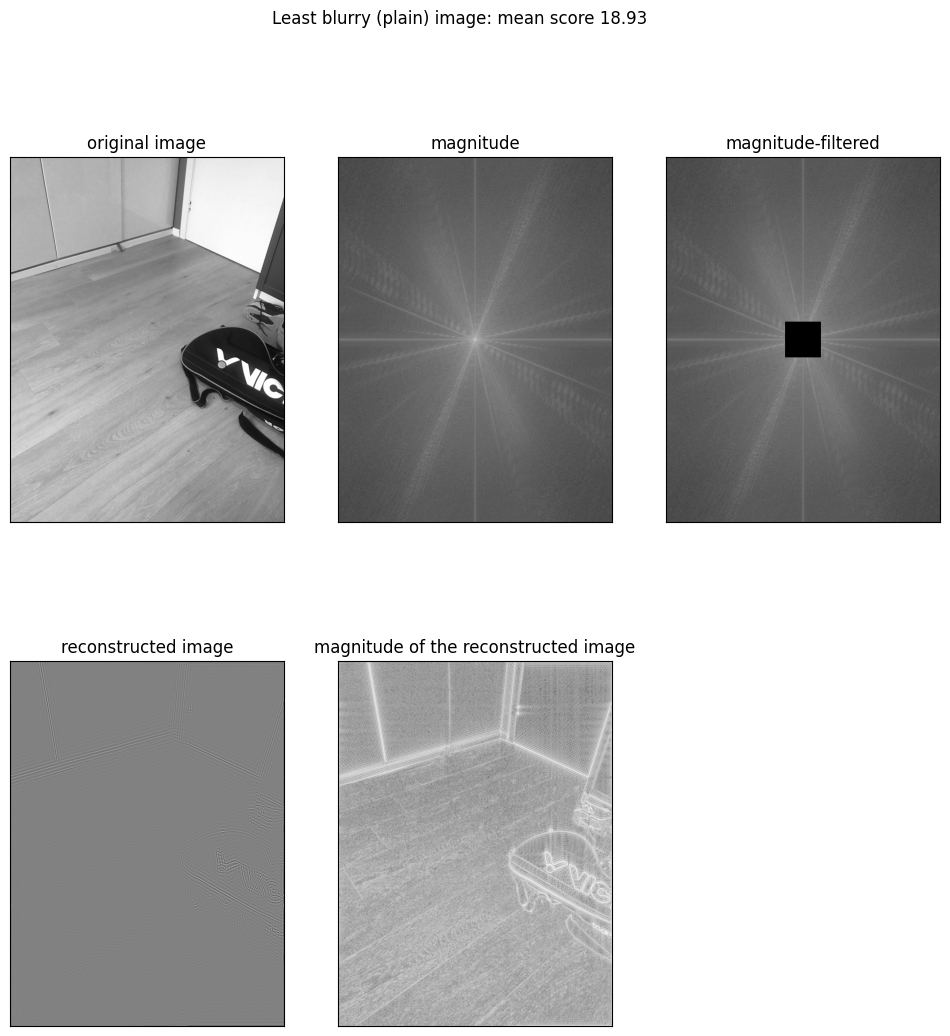

In [52]:
plot_steps(step_images[4], suptitle=f'Least blurry (plain) image: mean score {np.round(scores[4], 2)}')

Comparing the magnitude of the sharp and blurry images, we can see that there are more high frequencies present in the sharp image compared to the blurry one without taking the background into consideration.
However, the correct combination of size and threshold is hard. I think you would need to experiment with images of the same resolution and approximately the same object.